In [2]:
import numpy as np
from sklearn.manifold import TSNE

#from utils import dump_dataset
import fasttext
import pandas as pd
import nltk
#nltk.download('stopwords') # Added (requested by system)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

stop_words = stopwords.words('french')

In [11]:
from fasttext import load_model

model = load_model('model/categories.ftz')

In [14]:
# Take 5000 first words
words = model.words
print(len(words))
words = words[0:5000] 
print(len(words))



# Transform to vectors
words_vector = []
for word in words:
    words_vector.append(model.get_word_vector(word))


83524
5000


In [5]:
# Get labels and their vector
labels = model.labels
labels_vector = model.get_output_matrix()
num_labels = len(labels)

In [6]:
# Concat labels and words
labels_words_vectors = np.concatenate((np.array(labels_vector), np.array(words_vector)))
labels_words = np.concatenate((np.array(labels), np.array(words)))

In [7]:
# Take vectors in 2D
labels_words_vectors_2D = TSNE(n_components=2).fit_transform(labels_words_vectors)

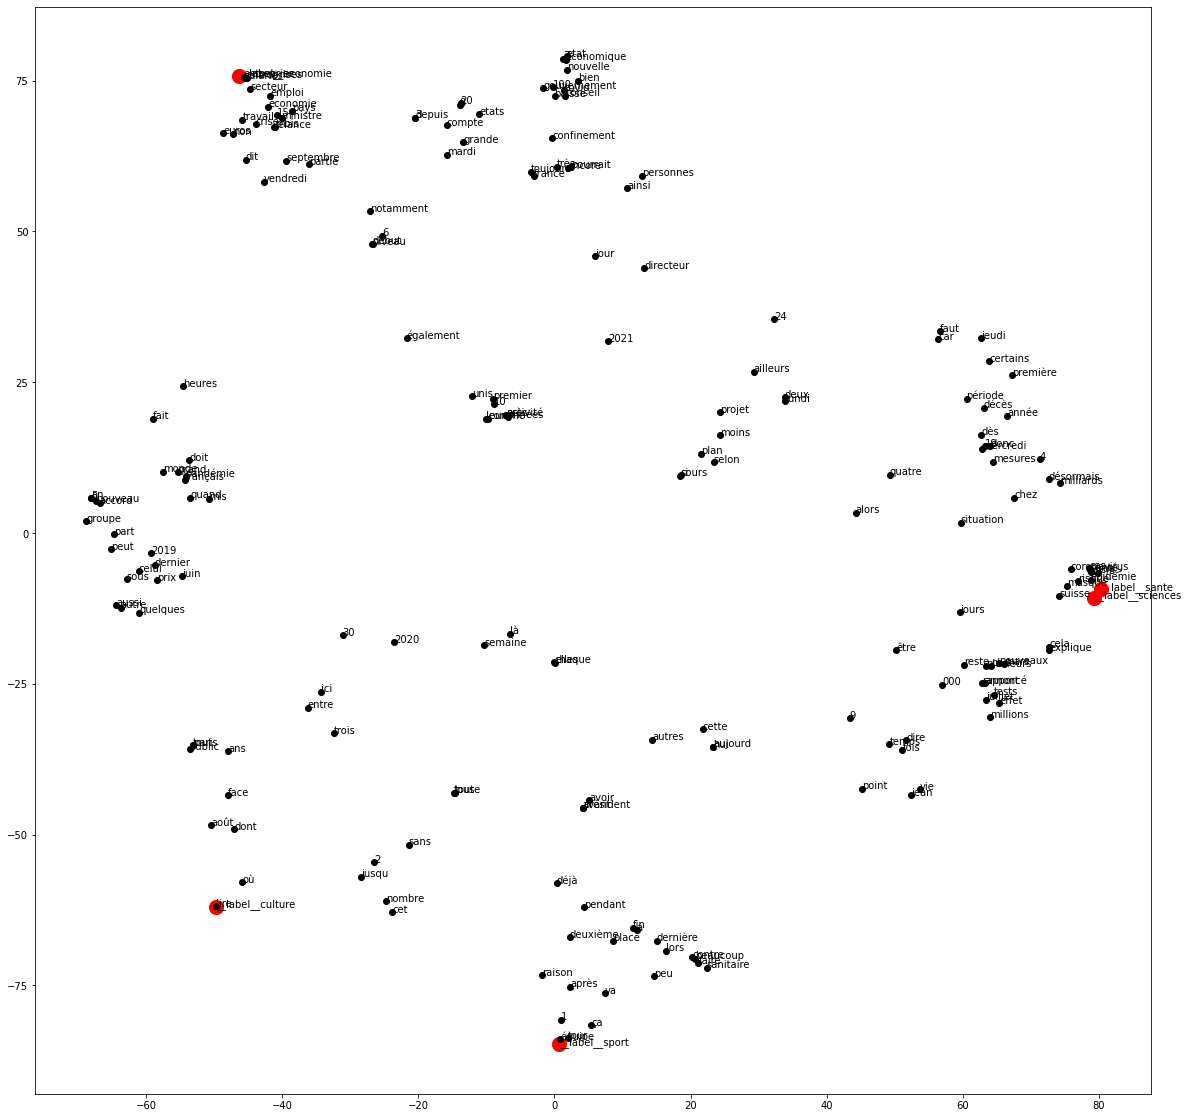

In [9]:
fig, ax = plt.subplots(figsize=(20,20))

num_words = 200

lenght_to_be_considered = num_labels + num_words

# Set points
for i, vect in enumerate(labels_words_vectors_2D[:lenght_to_be_considered]):
    if(i < num_labels):
        ax.scatter(vect[0], vect[1], color="red", s = 200)
    else:
        ax.scatter(vect[0], vect[1], color="black")

# Set annotations
texts = []
for i, txt in enumerate(labels_words[:lenght_to_be_considered]):
    texts.append(ax.annotate(txt, labels_words_vectors_2D[i]))
   